In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import pathlib
#from tensorflow.keras.preprocessing import image_dataset_from_directory
from matplotlib import gridspec
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

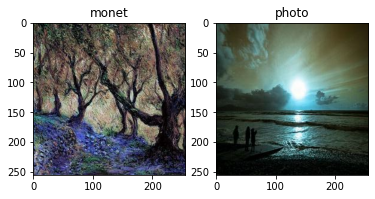

In [2]:
import cv2
image = cv2.imread('../input/gan-getting-started/monet_jpg/011835cfbf.jpg')

plt.subplot(121),plt.imshow(image),plt.title('monet')

image2=cv2.imread('../input/gan-getting-started/photo_jpg/000ded5c41.jpg')
plt.subplot(122),(image),plt.imshow(image2),plt.title('photo')

plt.show()

In [3]:
import warnings

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()



# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# define dataset
imgs=[]
INPUT='../input/gan-getting-started/monet_jpg/'
for img_name in os.listdir(INPUT):
    img=cv2.imread(INPUT+img_name)
    
    # some preprocessing
    
    
    imgs.append(img)
    
X=np.array(imgs)
X_train=X[:260]
X_val = X[260:]
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
#X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))

#X_val = X_val.reshape((len(X_val), np.prod(X_val.shape[1:])))

print(X_val.shape)
print(X_train.shape)

(40, 256, 256, 3)
(260, 256, 256, 3)


2021-10-28 14:52:37.450178: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 14:52:37.535924: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 14:52:37.536633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 14:52:37.538180: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

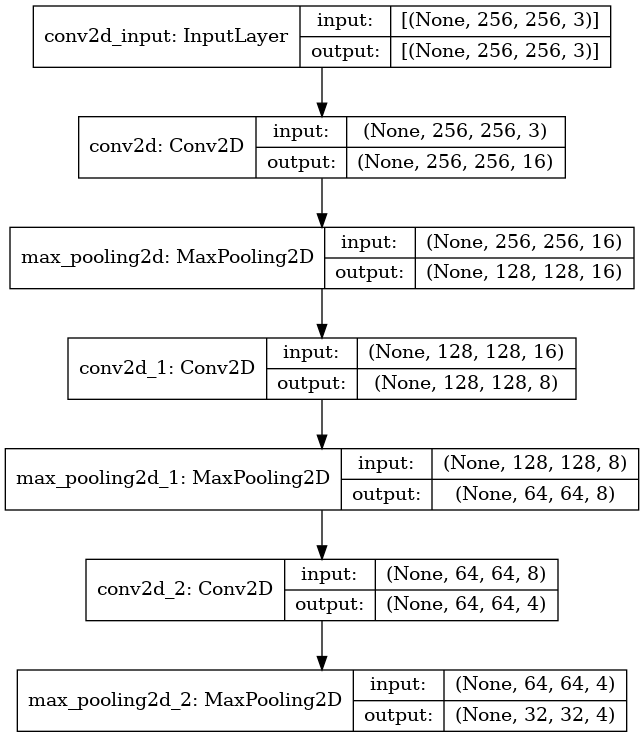

In [4]:
# define model:
conv_encoder = keras.Sequential([
    
    keras.layers.Conv2D(16, kernel_size=7, padding="same", activation="selu",input_shape=[256,256,3],data_format="channels_last"), # first argument of conv2d is no. of filters
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(4, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    
])

conv_decoder = keras.Sequential([
    keras.layers.Conv2DTranspose(4, kernel_size=3, strides=2, padding="same",activation="selu",input_shape=[32, 32, 4]),
    keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, padding="same",activation="selu"),
    keras.layers.Conv2DTranspose(3, kernel_size=3, strides=2, padding="same",activation="sigmoid"),    
])

autoencoder = keras.Sequential([conv_encoder,conv_decoder])
keras.utils.plot_model(conv_encoder, "1.png", show_shapes=True)


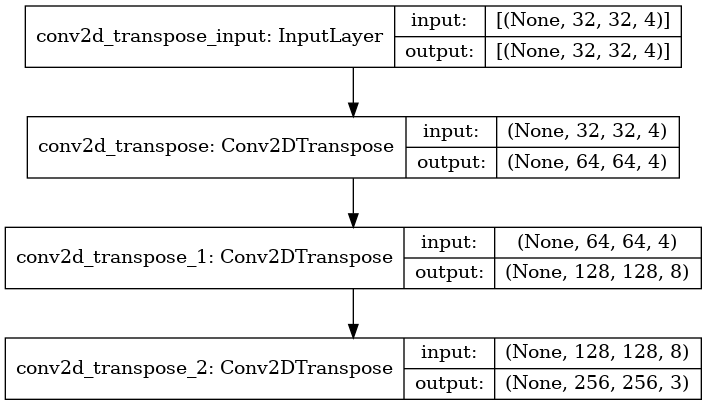

In [5]:
keras.utils.plot_model(conv_decoder, "2.png", show_shapes=True)

In [6]:

autoencoder.compile(optimizer=keras.optimizers.SGD(lr=1.5),loss='binary_crossentropy')
hist = autoencoder.fit(X_train, X_train, epochs=100,batch_size=5,
                      validation_data=(X_val,X_val))


2021-10-28 14:52:41.771313: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-10-28 14:52:43.084846: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


52/52 [==============================] - 8s 24ms/step - loss: 0.6913 - val_loss: 0.6784
Epoch 2/100
52/52 [==============================] - 1s 17ms/step - loss: 0.6890 - val_loss: 0.6785
Epoch 3/100
52/52 [==============================] - 1s 17ms/step - loss: 0.6896 - val_loss: 0.6927
Epoch 4/100
52/52 [==============================] - 1s 17ms/step - loss: 0.6815 - val_loss: 0.6285
Epoch 5/100
52/52 [==============================] - 1s 17ms/step - loss: 0.6628 - val_loss: 0.6254
Epoch 6/100
52/52 [==============================] - 1s 17ms/step - loss: 0.6433 - val_loss: 0.7378
Epoch 7/100
52/52 [==============================] - 1s 17ms/step - loss: 0.6363 - val_loss: 0.6281
Epoch 8/100
52/52 [==============================] - 1s 17ms/step - loss: 0.6281 - val_loss: 0.6076
Epoch 9/100
52/52 [==============================] - 1s 16ms/step - loss: 0.6241 - val_loss: 0.6062
Epoch 10/100
52/52 [==============================] - 1s 16ms/step - loss: 0.6211 - val_loss: 0.6042
Epoch 11/10

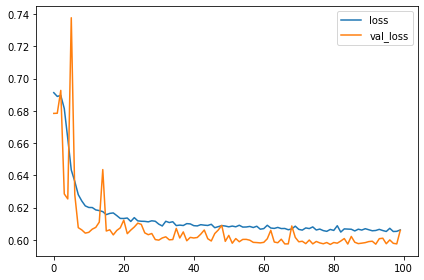

In [7]:
hist_df = pd.DataFrame(hist.history)
hist_df.loss.plot()
hist_df.val_loss.plot()
plt.legend()
plt.show()

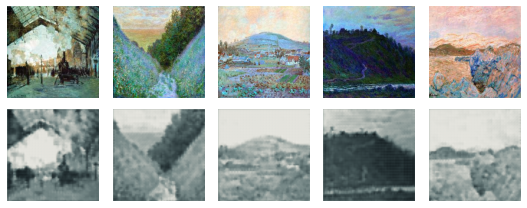

In [8]:
def plot_image(image):
    
    image = image.reshape(256,256,3)
    
    plt.imshow(image)
    plt.axis('off')
def show_reconstructions(model,n_images=5):
    reconstructions = model.predict(X_val[:5])
    
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for img_idx in range(n_images):
        plt.subplot(2, n_images, 1+img_idx)
        plot_image(X_val[img_idx])
        
        plt.subplot(2, n_images, 1 + n_images + img_idx)
        
        plot_image(reconstructions[img_idx])
        
show_reconstructions(autoencoder)